In [96]:
import numpy as np
import pandas as pd

In [97]:
dataset = pd.read_csv('boston_housing.csv').values
X = dataset[:,:-1]
y = dataset[:,-1]

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [98]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(X,y,test_size=0.3,random_state=1)

In [99]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_split=150,random_state=0)
dt.fit(xTrain,yTrain)
# min_samples_split이 작을 경우, overfitting 발생할 수 있음
# min_samples_split이 클 경우, underfitting 발생할 수 있음
# 적절한 min_samples_split 선정

DecisionTreeRegressor(min_samples_split=150, random_state=0)

In [100]:
yTestPred = dt.predict(xTest)
yTrainPred = dt.predict(xTrain)

In [101]:
from sklearn.metrics import mean_squared_error
print('*[train mse]: ', mean_squared_error(yTrain,yTrainPred))
print('*[test mse]: ', mean_squared_error(yTest,yTestPred))

*[train mse]:  37.78569461554998
*[test mse]:  46.21782263046953


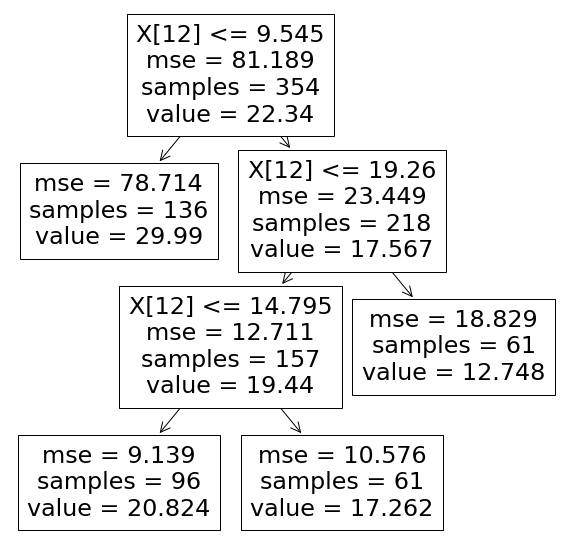

In [106]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dt)
plt.show()

In [105]:
print(dt.tree_.node_count)
# dt의 모든 node의 수
print(dt.tree_.children_left)
# 각 node의 좌측 children node index
print(dt.tree_.children_right)
# 각 node의 우측 children node index
print(dt.tree_.feature)
# 각 node decision에 사용된 특징 index
print(dt.tree_.threshold)
# 각 node decision에 사용된 임계값(부등호 기준값)
# ex> x[12] < 10 → dt.tree_.feature:12, dt.tree_.threshold:10
print(dt.tree_.value)
# 각 node에 속한 데이터의 평균값(leaf node의 값은 prediction이 됨)

7
[ 1 -1  3  4 -1 -1 -1]
[ 2 -1  6  5 -1 -1 -1]
[12 -2 12 12 -2 -2 -2]
[ 9.54500008 -2.         19.26000023 14.79500008 -2.         -2.
 -2.        ]
[[[22.33983051]]

 [[29.98970588]]

 [[17.56743119]]

 [[19.44012739]]

 [[20.82395833]]

 [[17.26229508]]

 [[12.74754098]]]
